Análise Buenos Drivers - Case Técnico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")

Carregamento e Preparação dos Dados

In [2]:
# Carregar dados
df = pd.read_csv('data.csv')
dict_df = pd.read_csv('dictionary.csv')

print("=== DICIONÁRIO DE VARIÁVEIS ===")
print("O dicionário foi utilizado para entender:")
print("- Escalas de medida (1-7 para questões Likert)")
print("- Significado de cada variável")
print("- Categorias das variáveis demográficas")
print("- Construção das variáveis compostas")

# Limpeza dos dados
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['Idade'] = df['Idade'].str.extract('(\d+)').astype(float)

# Mapeamento de categorias
filhos_map = {
    'Não possuo filhos': 0, '1 filho': 1, '2 filhos': 2,
    '3 filhos': 3, '4 filhos': 4, '5 filhos ou mais': 5
}
df['Filhos'] = df['Filhos'].map(filhos_map)

print(f"\nDados carregados: {len(df)} respondentes")

=== DICIONÁRIO DE VARIÁVEIS ===
O dicionário foi utilizado para entender:
- Escalas de medida (1-7 para questões Likert)
- Significado de cada variável
- Categorias das variáveis demográficas
- Construção das variáveis compostas

Dados carregados: 200 respondentes


Criação de Variáveis Compostas


In [3]:
# Aversão ao risco
df['Aversao_Score'] = df[['Aversao1', 'Aversao2', 'Aversao3', 'Aversao4']].mean(axis=1)

# Confiança na marca
confianca_cols = [f'Confianca{i}' for i in range(1, 10)]
df['Confianca_Score'] = df[confianca_cols].mean(axis=1)

# Segurança (invertendo Segurança3)
df['Segurança3_inverted'] = 8 - df['Segurança3']
df['Seguranca_Score'] = df[['Segurança1', 'Segurança2', 'Segurança3_inverted']].mean(axis=1)

# Intenção de uso (variável alvo)
intencao_cols = ['Intenção1', 'Intenção2', 'Intenção3']
df['Intencao_Score'] = df[intencao_cols].mean(axis=1)

# Comunicação
comunicacao_cols = [f'Comunicação{i}' for i in range(1, 8)]
df['Comunicacao_Score'] = df[comunicacao_cols].mean(axis=1)

# Segmentação por intenção
df['Segmento_Intencao'] = pd.cut(
    df['Intencao_Score'], 
    bins=[0, 3, 5, 7], 
    labels=['Baixa', 'Media', 'Alta']
)

print("Variáveis compostas criadas com sucesso")

Variáveis compostas criadas com sucesso


A) Suficiência das Informações


In [4]:
print("=" * 80)
print("A) SUFICIÊNCIA DAS INFORMAÇÕES")
print("=" * 80)

print("INFORMAÇÕES DISPONÍVEIS:")
print("• 200 respondentes com conhecimento da marca (awareness)")
print("• Dados demográficos: gênero, idade, renda, filhos, localização")
print("• Aversão a risco: 4 dimensões comportamentais")
print("• Percepção da marca: confiança (9 itens), segurança (3 itens)")
print("• Intenção de uso: 3 itens (proxy para corridas futuras)")
print("• Exposição à comunicação: 7 dimensões")

print("\nINFORMAÇÕES FALTANTES:")
print("• Dados de uso real do aplicativo")
print("• Comparação direta com concorrentes")
print("• Barreiras específicas de adoção")
print("• Experiência prática com o serviço")
print("• Sensibilidade a preços e promoções")

print("\nCONCLUSÃO: As informações são suficientes para diagnóstico dos drivers")
print("de intenção, mas insuficientes para ações específicas de conversão.")

A) SUFICIÊNCIA DAS INFORMAÇÕES
INFORMAÇÕES DISPONÍVEIS:
• 200 respondentes com conhecimento da marca (awareness)
• Dados demográficos: gênero, idade, renda, filhos, localização
• Aversão a risco: 4 dimensões comportamentais
• Percepção da marca: confiança (9 itens), segurança (3 itens)
• Intenção de uso: 3 itens (proxy para corridas futuras)
• Exposição à comunicação: 7 dimensões

INFORMAÇÕES FALTANTES:
• Dados de uso real do aplicativo
• Comparação direta com concorrentes
• Barreiras específicas de adoção
• Experiência prática com o serviço
• Sensibilidade a preços e promoções

CONCLUSÃO: As informações são suficientes para diagnóstico dos drivers
de intenção, mas insuficientes para ações específicas de conversão.


Gráfico 1: Distribuição das Variáveis Principais

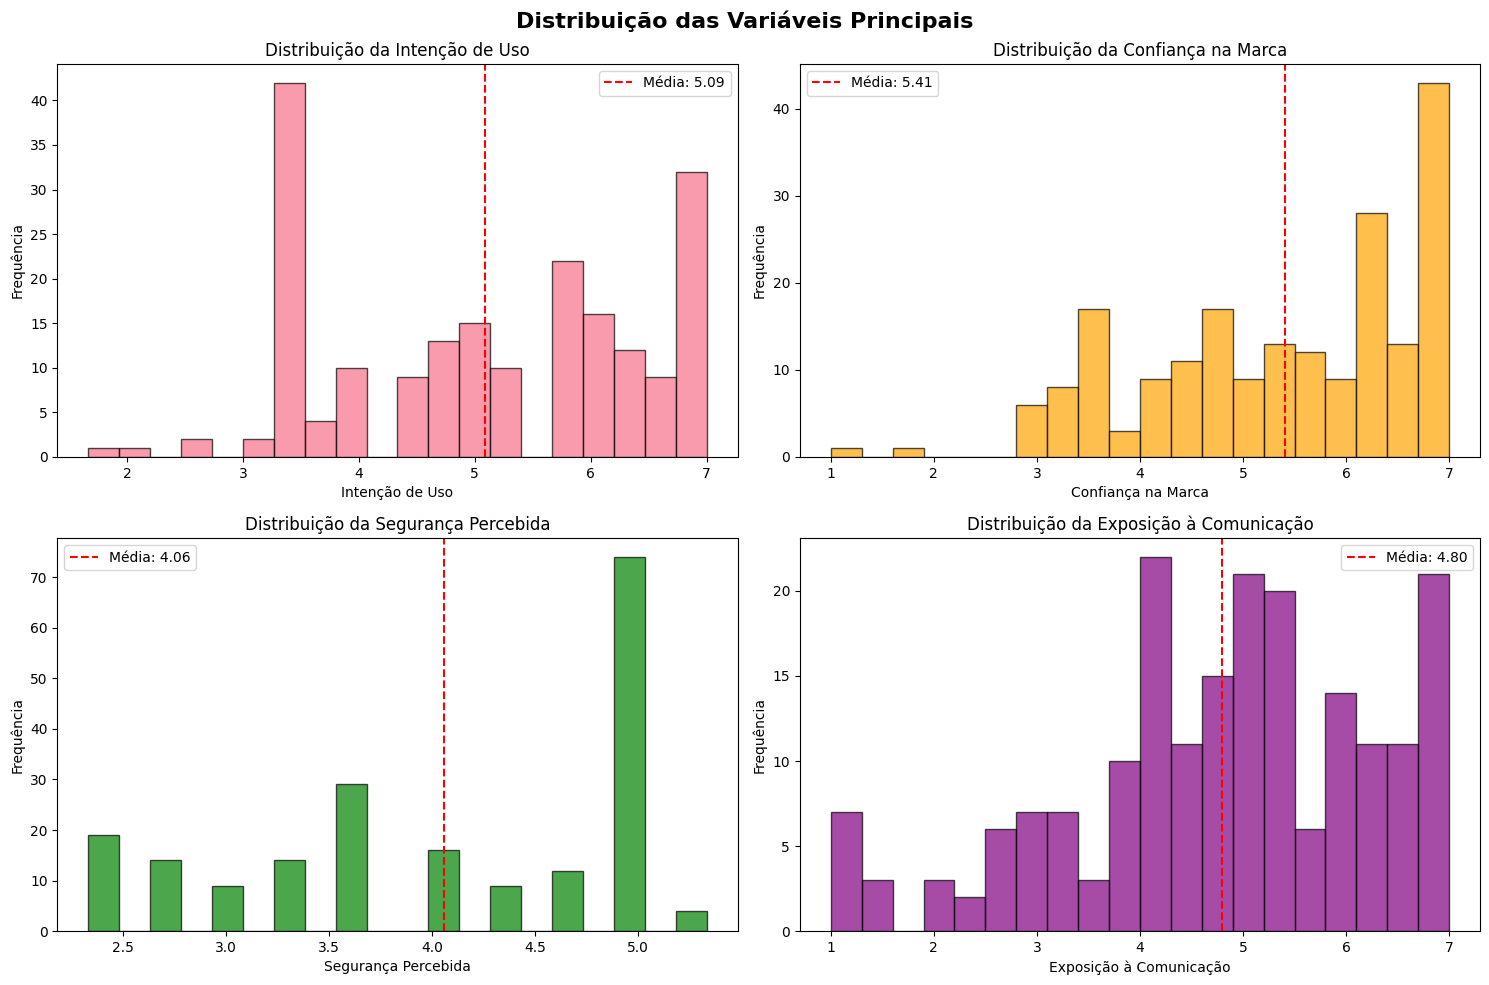

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Principais', fontsize=16, fontweight='bold')

# Intenção de uso
axes[0,0].hist(df['Intencao_Score'], bins=20, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Intenção de Uso')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição da Intenção de Uso')
axes[0,0].axvline(df['Intencao_Score'].mean(), color='red', linestyle='--', label=f'Média: {df["Intencao_Score"].mean():.2f}')
axes[0,0].legend()

# Confiança
axes[0,1].hist(df['Confianca_Score'], bins=20, alpha=0.7, edgecolor='black', color='orange')
axes[0,1].set_xlabel('Confiança na Marca')
axes[0,1].set_ylabel('Frequência')
axes[0,1].set_title('Distribuição da Confiança na Marca')
axes[0,1].axvline(df['Confianca_Score'].mean(), color='red', linestyle='--', label=f'Média: {df["Confianca_Score"].mean():.2f}')
axes[0,1].legend()

# Segurança
axes[1,0].hist(df['Seguranca_Score'], bins=20, alpha=0.7, edgecolor='black', color='green')
axes[1,0].set_xlabel('Segurança Percebida')
axes[1,0].set_ylabel('Frequência')
axes[1,0].set_title('Distribuição da Segurança Percebida')
axes[1,0].axvline(df['Seguranca_Score'].mean(), color='red', linestyle='--', label=f'Média: {df["Seguranca_Score"].mean():.2f}')
axes[1,0].legend()

# Comunicação
axes[1,1].hist(df['Comunicacao_Score'], bins=20, alpha=0.7, edgecolor='black', color='purple')
axes[1,1].set_xlabel('Exposição à Comunicação')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição da Exposição à Comunicação')
axes[1,1].axvline(df['Comunicacao_Score'].mean(), color='red', linestyle='--', label=f'Média: {df["Comunicacao_Score"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

B) Questionário Complementar Sugerido

In [6]:
print("=" * 80)
print("B) QUESTIONÁRIO COMPLEMENTAR (10 perguntas essenciais)")
print("=" * 80)

questions = [
    "1. Você já baixou o aplicativo Buenos Drivers? (Sim/Não)",
    "2. Se não baixou, qual foi o principal motivo?",
    "3. Se já usou, como avalia sua experiência? (1-5 estrelas)",
    "4. Qual aplicativo de mobilidade você utiliza atualmente?",
    "5. Com que frequência utiliza aplicativos de mobilidade?",
    "6. O que te faria trocar permanentemente para o Buenos Drivers?",
    "7. Qual fator é mais importante na escolha? (Preço/Segurança/Confiança)",
    "8. Você pagaria mais por algum benefício extra? Qual?",
    "9. Como tomou conhecimento do Buenos Drivers?",
    "10. Que tipo de promoção te motivaria a usar o aplicativo?"
]

for i, quest in enumerate(questions, 1):
    print(f"{quest}")

print("\nOBJETIVO DAS PERGUNTAS ADICIONAIS:")
print("- Entender barreiras reais de adoção")
print("- Identificar concorrentes principais")
print("- Compreender fatores decisionais")
print("- Explorar sensibilidade a preços")

B) QUESTIONÁRIO COMPLEMENTAR (10 perguntas essenciais)
1. Você já baixou o aplicativo Buenos Drivers? (Sim/Não)
2. Se não baixou, qual foi o principal motivo?
3. Se já usou, como avalia sua experiência? (1-5 estrelas)
4. Qual aplicativo de mobilidade você utiliza atualmente?
5. Com que frequência utiliza aplicativos de mobilidade?
6. O que te faria trocar permanentemente para o Buenos Drivers?
7. Qual fator é mais importante na escolha? (Preço/Segurança/Confiança)
8. Você pagaria mais por algum benefício extra? Qual?
9. Como tomou conhecimento do Buenos Drivers?
10. Que tipo de promoção te motivaria a usar o aplicativo?

OBJETIVO DAS PERGUNTAS ADICIONAIS:
- Entender barreiras reais de adoção
- Identificar concorrentes principais
- Compreender fatores decisionais
- Explorar sensibilidade a preços


C) Metodologia de Análise

In [7]:
print("=" * 80)
print("C) METODOLOGIA DE ANÁLISE")
print("=" * 80)

print("OBJETIVO PRINCIPAL: Identificar drivers da intenção de uso")
print("VARIÁVEL ALVO: Intencao_Score (proxy para aumento de corridas)")

# Análise de Correlação
print("\n1. ANÁLISE DE CORRELAÇÃO (Pearson):")
variables = ['Confianca_Score', 'Seguranca_Score', 'Aversao_Score', 'Comunicacao_Score']
correlations = {}

for var in variables:
    corr, p_val = pearsonr(df[var], df['Intencao_Score'])
    correlations[var] = {'correlation': corr, 'p_value': p_val}
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"   {var:<18}: {corr:7.3f} {sig} (p = {p_val:.4f})")

C) METODOLOGIA DE ANÁLISE
OBJETIVO PRINCIPAL: Identificar drivers da intenção de uso
VARIÁVEL ALVO: Intencao_Score (proxy para aumento de corridas)

1. ANÁLISE DE CORRELAÇÃO (Pearson):
   Confianca_Score   :   0.648 *** (p = 0.0000)
   Seguranca_Score   :   0.299 *** (p = 0.0000)
   Aversao_Score     :   0.047  (p = 0.5051)
   Comunicacao_Score :   0.424 *** (p = 0.0000)


Gráfico 2: Correlação com Intenção de Uso

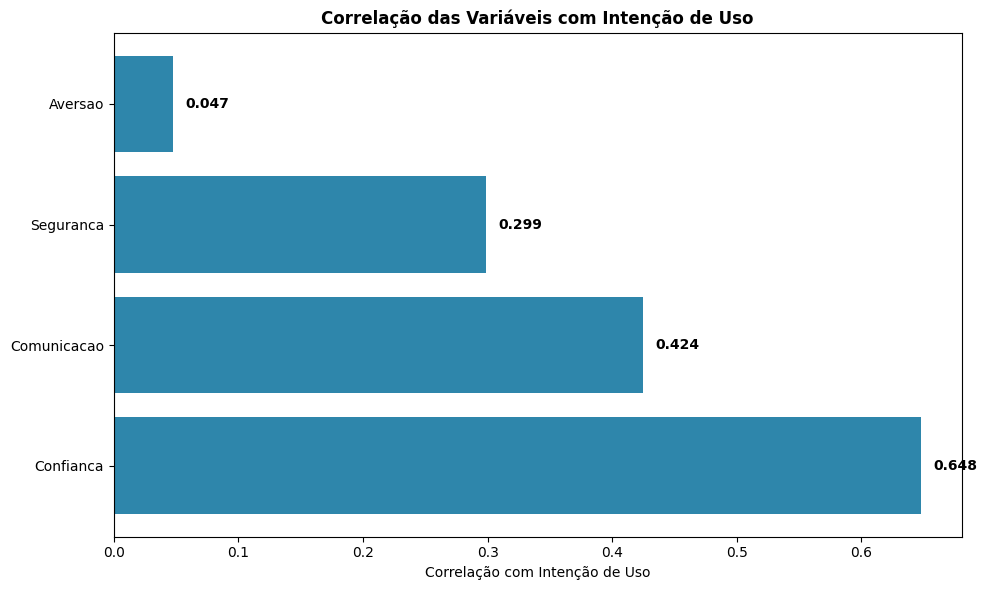

In [8]:
# Preparar dados para gráfico de correlação
corr_data = []
for var, stats in correlations.items():
    corr_data.append({
        'Variável': var.replace('_Score', '').replace('_', ' ').title(),
        'Correlação': stats['correlation'],
        'Abs_Correlação': abs(stats['correlation'])
    })

corr_df = pd.DataFrame(corr_data).sort_values('Abs_Correlação', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(corr_df['Variável'], corr_df['Correlação'], 
                color=['#2E86AB' if x > 0 else '#A23B72' for x in corr_df['Correlação']])
plt.xlabel('Correlação com Intenção de Uso')
plt.title('Correlação das Variáveis com Intenção de Uso', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.05), 
             bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', 
             ha='left' if width > 0 else 'right', 
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
# Análise de Segmentos
print("\n2. ANÁLISE POR SEGMENTOS DE INTENÇÃO:")
segment_stats = df.groupby('Segmento_Intencao').agg({
    'Intencao_Score': ['count', 'mean', 'std'],
    'Confianca_Score': 'mean',
    'Seguranca_Score': 'mean',
    'Aversao_Score': 'mean', 
    'Comunicacao_Score': 'mean'
}).round(3)

print(segment_stats)



2. ANÁLISE POR SEGMENTOS DE INTENÇÃO:
                  Intencao_Score               Confianca_Score  \
                           count   mean    std            mean   
Segmento_Intencao                                                
Baixa                          6  2.500  0.548           3.574   
Media                         93  3.971  0.666           4.741   
Alta                         101  6.277  0.604           6.135   

                  Seguranca_Score Aversao_Score Comunicacao_Score  
                             mean          mean              mean  
Segmento_Intencao                                                  
Baixa                       4.778         4.208             2.619  
Media                       3.763         5.263             4.276  
Alta                        4.290         5.366             5.407  


Gráfico 3: Comparação entre Segmentos


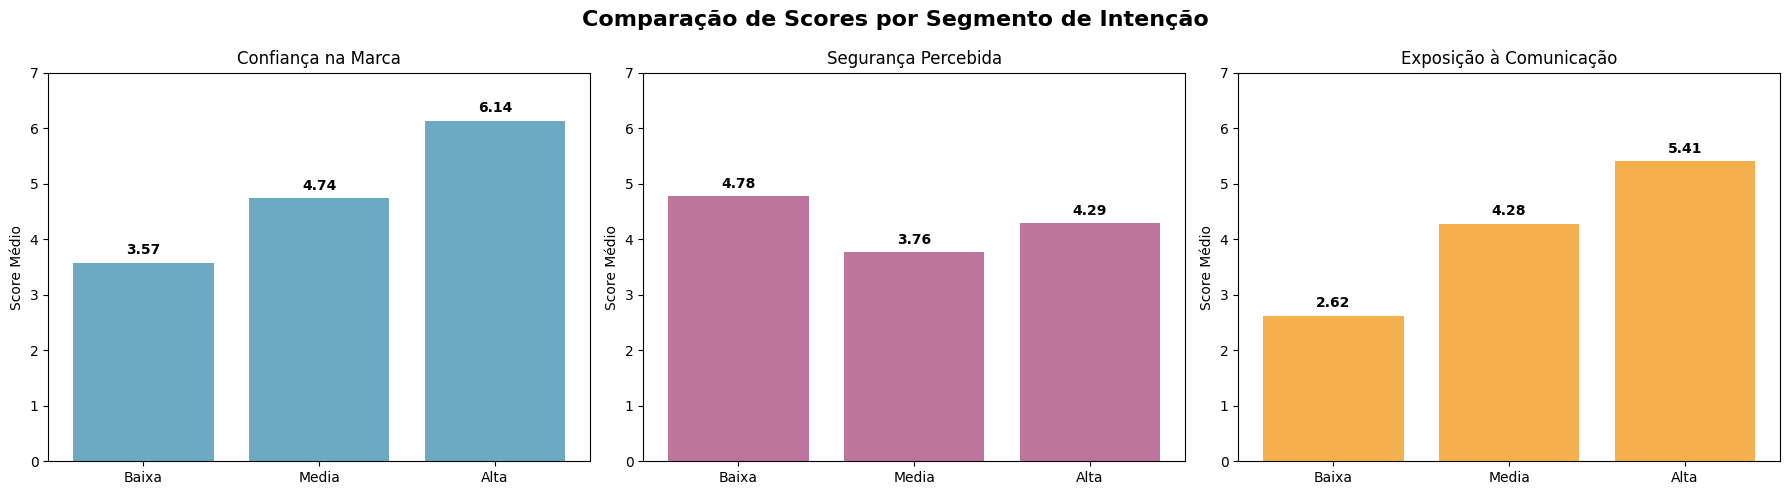

In [10]:
# Dados para comparação entre segmentos
segment_means = df.groupby('Segmento_Intencao')[['Confianca_Score', 'Seguranca_Score', 'Comunicacao_Score']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparação de Scores por Segmento de Intenção', fontsize=16, fontweight='bold')

variables_plot = ['Confianca_Score', 'Seguranca_Score', 'Comunicacao_Score']
titles = ['Confiança na Marca', 'Segurança Percebida', 'Exposição à Comunicação']
colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, (var, title, color) in enumerate(zip(variables_plot, titles, colors)):
    bars = axes[i].bar(segment_means.index, segment_means[var], color=color, alpha=0.7)
    axes[i].set_title(title)
    axes[i].set_ylabel('Score Médio')
    axes[i].set_ylim(0, 7)
    
    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
# Teste de Diferenças Estatísticas
print("\n3. TESTES ESTATÍSTICOS:")
alta_intencao = df[df['Segmento_Intencao'] == 'Alta']
baixa_intencao = df[df['Segmento_Intencao'] == 'Baixa']

print("Diferenças entre segmentos Alta vs Baixa intenção:")
for var in ['Confianca_Score', 'Seguranca_Score', 'Comunicacao_Score']:
    t_stat, p_val = ttest_ind(alta_intencao[var], baixa_intencao[var])
    diff = alta_intencao[var].mean() - baixa_intencao[var].mean()
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "n.s."
    print(f"   {var:<18}: diferença = {diff:+.2f}, t = {t_stat:.3f}, p = {p_val:.4f} {sig}")


3. TESTES ESTATÍSTICOS:
Diferenças entre segmentos Alta vs Baixa intenção:
   Confianca_Score   : diferença = +2.56, t = 6.904, p = 0.0000 ***
   Seguranca_Score   : diferença = -0.49, t = -1.185, p = 0.2385 n.s.
   Comunicacao_Score : diferença = +2.79, t = 5.565, p = 0.0000 ***


D) Storytelling para Stakeholders

In [12]:
print("=" * 80)
print("D) STORYTELLING PARA STAKEHOLDERS")
print("=" * 80)

# Estatísticas chave para o storytelling
corr_confianca = correlations['Confianca_Score']['correlation']
n_baixa_intencao = len(df[df['Segmento_Intencao'] == 'Baixa'])
perc_baixa = (n_baixa_intencao / len(df)) * 100
gap_confianca = alta_intencao['Confianca_Score'].mean() - baixa_intencao['Confianca_Score'].mean()

print("NARRATIVA PARA STAKEHOLDERS:")
print()
print(f"'Nossa análise com 200 potenciais usuários revela insights críticos'")
print(f"para o crescimento do Buenos Drivers:'")
print()
print(f"• A CONFIANÇA é o principal driver da intenção de uso,")
print(f"  com correlação de {corr_confianca:.3f} - o fator mais influente'")
print()
print(f"• Identificamos {n_baixa_intencao} usuários ({perc_baixa:.1f}%) com")
print(f"  BAIXA intenção de uso - nossa maior oportunidade de conversão'")
print()
print(f"• O gap de CONFIANÇA entre os segmentos é de {gap_confianca:.2f} pontos,'")
print(f"  indicando espaço significativo para melhoria'")
print()
print("RECOMENDAÇÕES ESTRATÉGICAS:")
print("1. Priorizar iniciativas de construção de confiança")
print("2. Desenvolver campanhas específicas para o segmento de baixa intenção") 
print("3. Reforçar comunicação sobre segurança e confiabilidade")
print("4. Implementar sistema transparente de avaliações")

D) STORYTELLING PARA STAKEHOLDERS
NARRATIVA PARA STAKEHOLDERS:

'Nossa análise com 200 potenciais usuários revela insights críticos'
para o crescimento do Buenos Drivers:'

• A CONFIANÇA é o principal driver da intenção de uso,
  com correlação de 0.648 - o fator mais influente'

• Identificamos 6 usuários (3.0%) com
  BAIXA intenção de uso - nossa maior oportunidade de conversão'

• O gap de CONFIANÇA entre os segmentos é de 2.56 pontos,'
  indicando espaço significativo para melhoria'

RECOMENDAÇÕES ESTRATÉGICAS:
1. Priorizar iniciativas de construção de confiança
2. Desenvolver campanhas específicas para o segmento de baixa intenção
3. Reforçar comunicação sobre segurança e confiabilidade
4. Implementar sistema transparente de avaliações


Gráfico 4: Análise de Gaps entre Segmentos

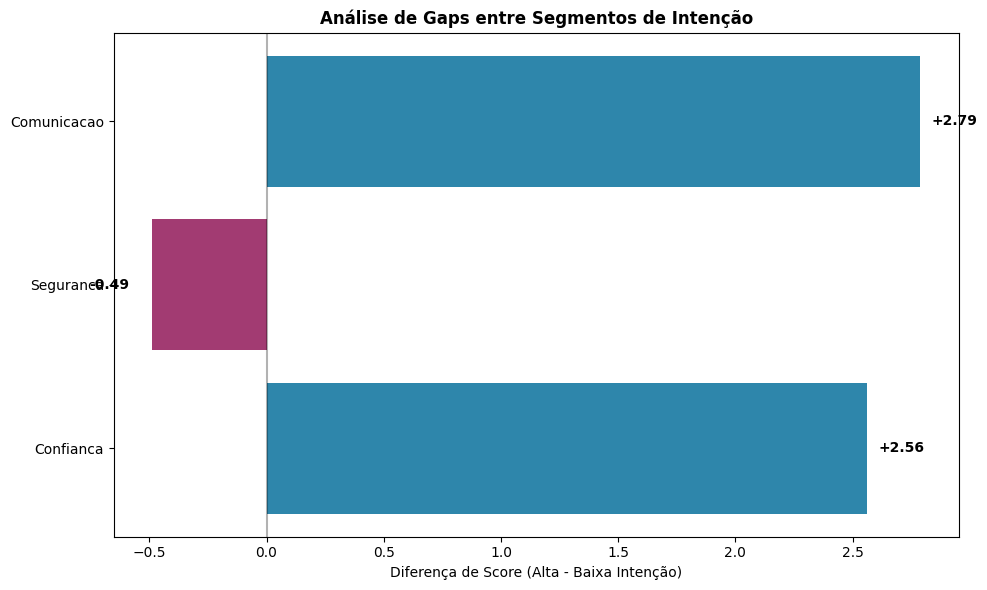

In [13]:
# Análise de gaps
gap_data = []
for var in ['Confianca_Score', 'Seguranca_Score', 'Comunicacao_Score']:
    gap = alta_intencao[var].mean() - baixa_intencao[var].mean()
    gap_data.append({
        'Variável': var.replace('_Score', '').replace('_', ' ').title(),
        'Gap': gap
    })

gap_df = pd.DataFrame(gap_data)

plt.figure(figsize=(10, 6))
bars = plt.barh(gap_df['Variável'], gap_df['Gap'], 
                color=['#2E86AB' if x > 0 else '#A23B72' for x in gap_df['Gap']])
plt.xlabel('Diferença de Score (Alta - Baixa Intenção)')
plt.title('Análise de Gaps entre Segmentos de Intenção', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.05 if width > 0 else -0.1), 
             bar.get_y() + bar.get_height()/2, 
             f'{width:+.2f}', 
             ha='left' if width > 0 else 'right', 
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

Gráfico 5: Matriz de Correlação

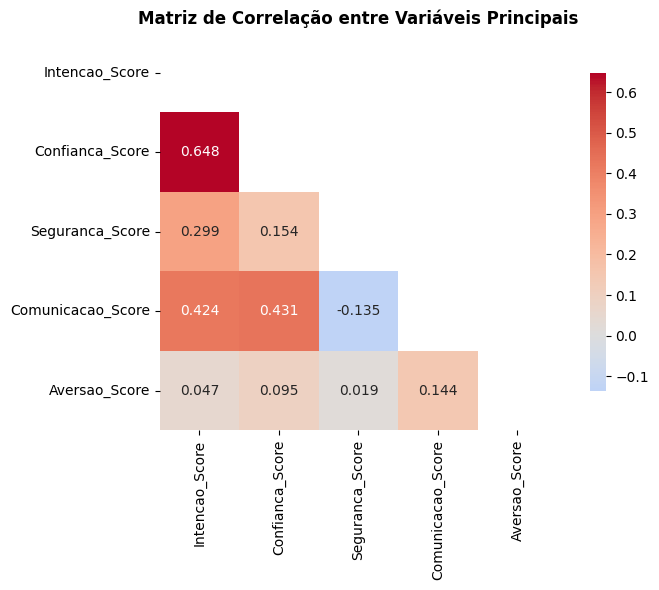

In [14]:
# Matriz de correlação
corr_matrix = df[['Intencao_Score', 'Confianca_Score', 'Seguranca_Score', 
                 'Comunicacao_Score', 'Aversao_Score']].corr()

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação entre Variáveis Principais', fontweight='bold')
plt.tight_layout()
plt.show()

Resumo Executivo

In [15]:
print("=" * 80)
print("RESUMO EXECUTIVO - PRINCIPAIS DESCOBERTAS")
print("=" * 80)

print("1. DRIVER PRINCIPAL:")
print(f"   • Confiança na marca: correlação de {corr_confianca:.3f} com intenção de uso")

print("\n2. SEGMENTAÇÃO:")
print(f"   • Alta intenção: {len(alta_intencao)} usuários ({len(alta_intencao)/len(df)*100:.1f}%)")
print(f"   • Média intenção: {len(df[df['Segmento_Intencao'] == 'Media'])} usuários ({len(df[df['Segmento_Intencao'] == 'Media'])/len(df)*100:.1f}%)")
print(f"   • Baixa intenção: {n_baixa_intencao} usuários ({perc_baixa:.1f}%)")

print("\n3. OPORTUNIDADES IDENTIFICADAS:")
print(f"   • Gap de confiança: {gap_confianca:.2f} pontos entre segmentos")
print(f"   • Exposição à comunicação: {alta_intencao['Comunicacao_Score'].mean() - baixa_intencao['Comunicacao_Score'].mean():.2f} pontos de diferença")

print("\n4. RECOMENDAÇÕES PRIORITÁRIAS:")
print("   • Campanhas focadas em construir confiança")
print("   • Comunicação transparente sobre segurança")
print("   • Segmentação para abordagens personalizadas")
print("   • Programa de indicação para ampliar awareness")

print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA - PRONTA PARA APRESENTAÇÃO")
print("=" * 80)

RESUMO EXECUTIVO - PRINCIPAIS DESCOBERTAS
1. DRIVER PRINCIPAL:
   • Confiança na marca: correlação de 0.648 com intenção de uso

2. SEGMENTAÇÃO:
   • Alta intenção: 101 usuários (50.5%)
   • Média intenção: 93 usuários (46.5%)
   • Baixa intenção: 6 usuários (3.0%)

3. OPORTUNIDADES IDENTIFICADAS:
   • Gap de confiança: 2.56 pontos entre segmentos
   • Exposição à comunicação: 2.79 pontos de diferença

4. RECOMENDAÇÕES PRIORITÁRIAS:
   • Campanhas focadas em construir confiança
   • Comunicação transparente sobre segurança
   • Segmentação para abordagens personalizadas
   • Programa de indicação para ampliar awareness

ANÁLISE CONCLUÍDA - PRONTA PARA APRESENTAÇÃO
